##Introduction

A credit card is a convinient tool that allows you to buy items now and pay for them later. Credit card is a physical payment card that allows you to get credit from a financial institution. If you buy something with credit, you are in debt. This means you owe money to the company that gave you the credit card. If you don't pay the entire amount at the end of each month, you pay a fee for the credit card called interest. .If managed correctly, credit cards can be great way to build credit and manage your money.

##Importance in Today's world:

Credit score cards are a common risk control method in the financial history. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to  the applicant. Credit scores can objectively quantify the magnitude of risk. Credit score is a number that depicts a consumer's credit worthiness.

##Importance of Predicting a good client:

Credit risk as the board in banks basically centers around deciding the the probability of customer's default or credit decay and how expensice it will end up being assuming it happens. It is important to consider major factors and predict beforehand the probability of consumers defaulting given their conditions, which is where a machine learning model comes in handy and allows the bank and major finantial institutions to predict whether the customer  will defaul or not. This project builds a machine learning model with the best accuracy possible.

##Impact on Banking Sector:

Banks receive a lot of credit card applications. Many of the applications do not get approved for a variety of reasons, like increased loan balances or poor-income levels. Manually analysing these applications can be very time consuming and full of human errors. Hence we can automate this task with the help of machine learning.

Import Libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

Importing Data set

In [5]:
a=pd.read_csv('Credit_card.csv')
aa=a
b=pd.read_csv('Credit_card_label.csv')
bb=b

In [6]:
aa

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [7]:
bb

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


Merging the Data Set

In [8]:
cc=pd.merge(aa, bb,
how='outer', on='Ind_ID')

##Understanding and Manupulating Data Set

- Checking the Unique value
   



In [9]:
cc

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [10]:
cc.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

Checking Null Value

In [11]:
cc.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [12]:
cc['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [13]:
cc[cc['GENDER'] == 'M'].count()

Ind_ID             568
GENDER             568
Car_Owner          568
Propert_Owner      568
CHILDREN           568
Annual_income      559
Type_Income        568
EDUCATION          568
Marital_status     568
Housing_type       568
Birthday_count     558
Employed_days      568
Mobile_phone       568
Work_Phone         568
Phone              568
EMAIL_ID           568
Type_Occupation    438
Family_Members     568
label              568
dtype: int64

In [14]:
cc[cc['GENDER'] == 'F'].count()

Ind_ID             973
GENDER             973
Car_Owner          973
Propert_Owner      973
CHILDREN           973
Annual_income      959
Type_Income        973
EDUCATION          973
Marital_status     973
Housing_type       973
Birthday_count     961
Employed_days      973
Mobile_phone       973
Work_Phone         973
Phone              973
EMAIL_ID           973
Type_Occupation    617
Family_Members     973
label              973
dtype: int64

In [15]:
# The mode here in gender is females. So we can change the null values to the mode value.

In [16]:
cc['GENDER'] = cc['GENDER'].fillna('F')

In [17]:
cc['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [18]:
cc['Annual_income'].unique()

array([ 180000. ,  315000. ,       nan,  450000. ,   90000. ,  472500. ,
        270000. ,  126000. ,  202500. ,  157500. ,  112500. ,  540000. ,
        292500. ,  135000. ,   76500. ,  215100. ,  225000. ,   67500. ,
        171000. ,  103500. ,   99000. ,  391500. ,   65250. ,   72900. ,
        360000. ,  256500. ,  675000. ,  247500. ,   85500. ,  121500. ,
        130500. ,  211500. ,   81000. ,   72000. ,  148500. ,  162000. ,
        195750. ,  585000. ,  216000. ,  306000. ,  108000. ,   63000. ,
         45000. ,  337500. ,  131400. ,  117000. ,  445500. ,  234000. ,
       1575000. ,  144000. ,   67050. ,   73350. ,  193500. ,  900000. ,
         94500. ,  198000. ,   54000. ,  166500. ,  167400. ,  153000. ,
        423000. ,  243000. ,  283500. ,  252000. ,  495000. ,  612000. ,
         36000. ,  139500. ,  133650. ,  427500. ,  261000. ,  231750. ,
         90900. ,   45900. ,  119250. ,   58500. ,  328500. ,  787500. ,
        594000. ,  119700. ,   69372. ,   37800. , 

In [19]:
cc['Annual_income'].mean()

191399.3262295082

In [20]:
cc['Annual_income'] = cc['Annual_income'].fillna(cc['Annual_income'].mean())

In [21]:
cc['Annual_income'].unique()

array([ 180000.        ,  315000.        ,  191399.32622951,
        450000.        ,   90000.        ,  472500.        ,
        270000.        ,  126000.        ,  202500.        ,
        157500.        ,  112500.        ,  540000.        ,
        292500.        ,  135000.        ,   76500.        ,
        215100.        ,  225000.        ,   67500.        ,
        171000.        ,  103500.        ,   99000.        ,
        391500.        ,   65250.        ,   72900.        ,
        360000.        ,  256500.        ,  675000.        ,
        247500.        ,   85500.        ,  121500.        ,
        130500.        ,  211500.        ,   81000.        ,
         72000.        ,  148500.        ,  162000.        ,
        195750.        ,  585000.        ,  216000.        ,
        306000.        ,  108000.        ,   63000.        ,
         45000.        ,  337500.        ,  131400.        ,
        117000.        ,  445500.        ,  234000.        ,
       1575000.        ,

In [22]:
cc['Birthday_count'] = cc['Birthday_count'].fillna(cc['Birthday_count'].mean())

In [23]:
cc['Birthday_count'].unique()

array([-18772.        , -13557.        , -16040.34207077, ...,
       -10229.        , -15292.        , -16601.        ])

In [24]:
cc['Type_Occupation'].mode()

0    Laborers
Name: Type_Occupation, dtype: object

In [25]:
cc['Type_Occupation'] = cc['Type_Occupation'].fillna('Laborers')

In [26]:
cc['Type_Occupation'].unique()

array(['Laborers', 'Core staff', 'Cooking staff', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [27]:
cc.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [28]:
for c in cc.columns:
    print("---- %s ---" % c)
    print(cc[c].value_counts())

---- Ind_ID ---
5008827    1
5142163    1
5024925    1
5143560    1
5068648    1
          ..
5148792    1
5142290    1
5095324    1
5118270    1
5053790    1
Name: Ind_ID, Length: 1548, dtype: int64
---- GENDER ---
F    980
M    568
Name: GENDER, dtype: int64
---- Car_Owner ---
N    924
Y    624
Name: Car_Owner, dtype: int64
---- Propert_Owner ---
Y    1010
N     538
Name: Propert_Owner, dtype: int64
---- CHILDREN ---
0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64
---- Annual_income ---
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 116, dtype: int64
---- Type_Income ---
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
---- EDUCATION ---
Secondary / secondary special    1031
Higher educati

In [29]:
cc.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [30]:
cc.to_csv('Cleaned_dataset')

## EDA

Univariate Analaysis
*   Histogram
*   Pie Chart



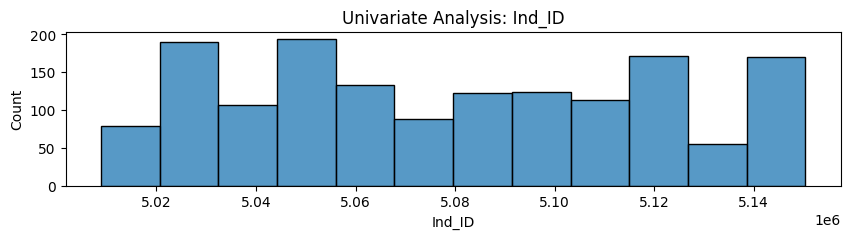

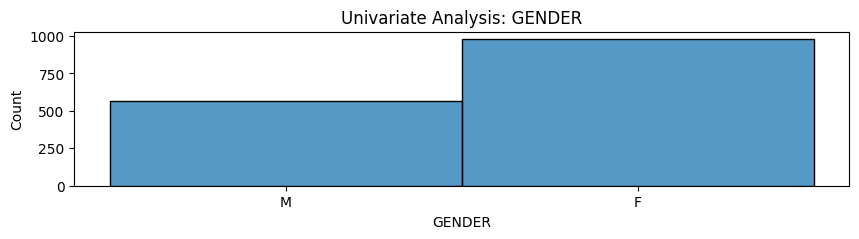

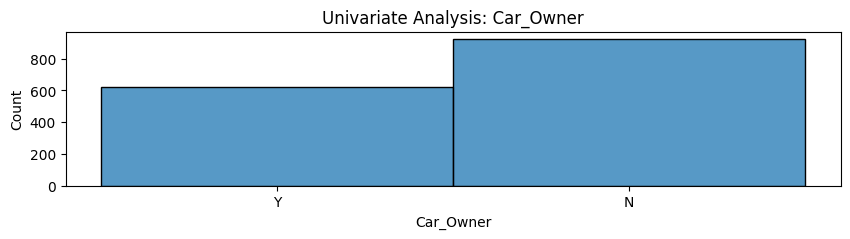

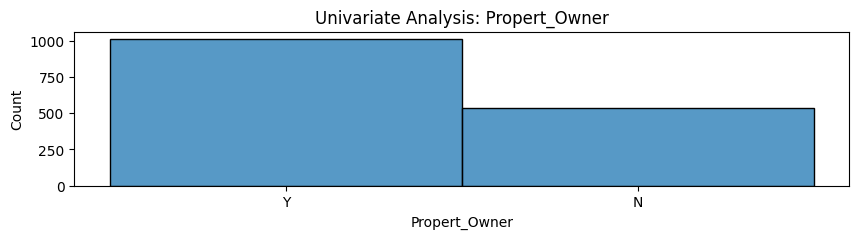

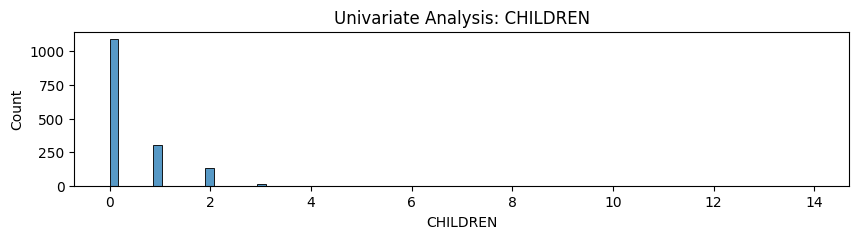

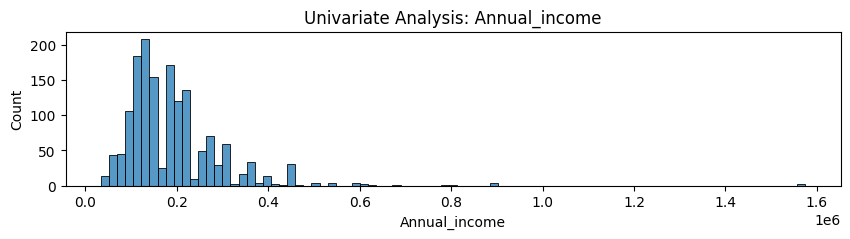

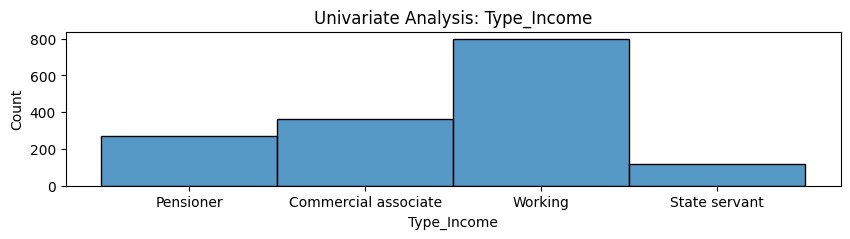

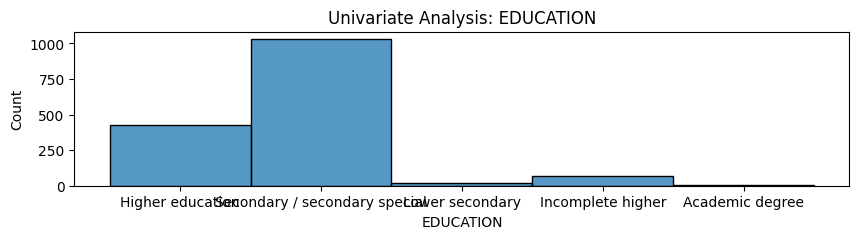

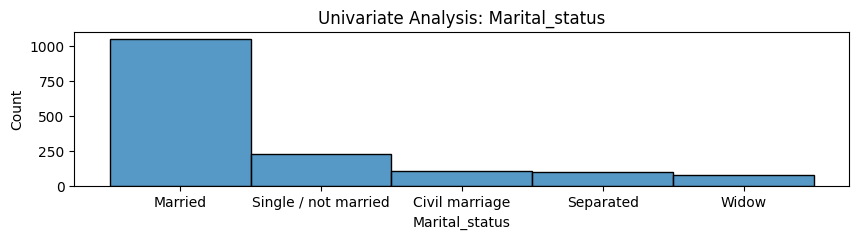

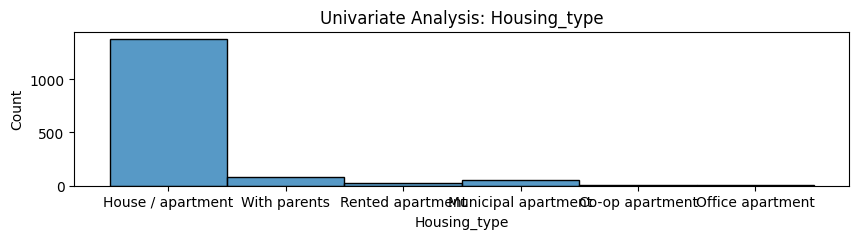

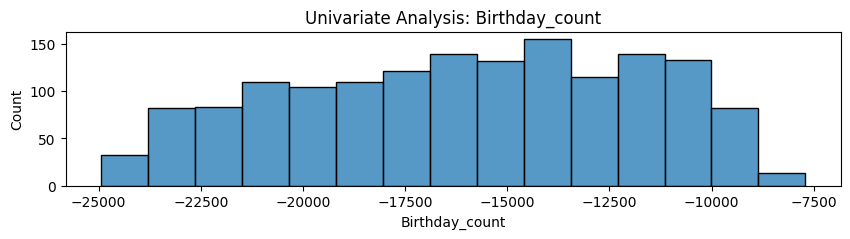

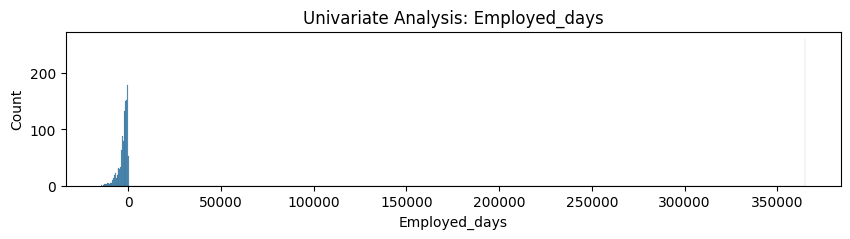

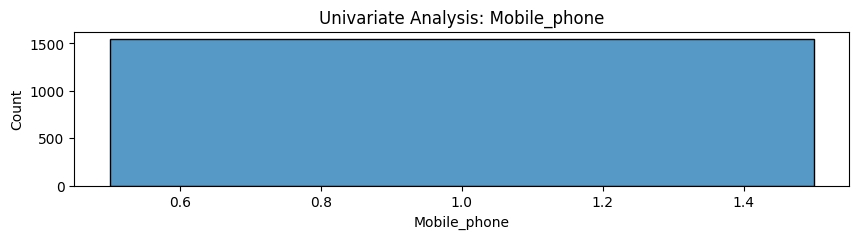

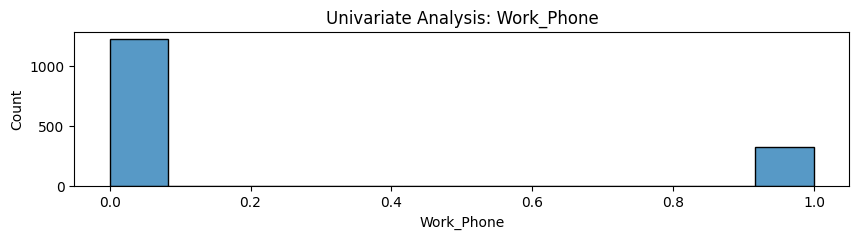

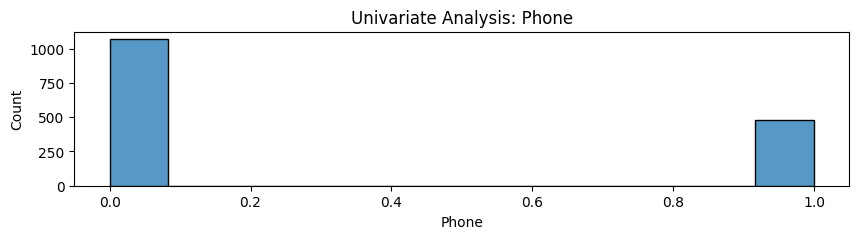

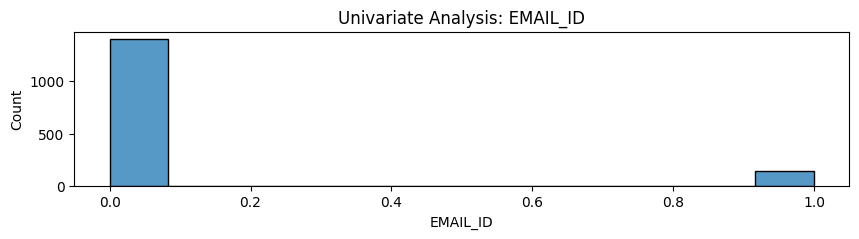

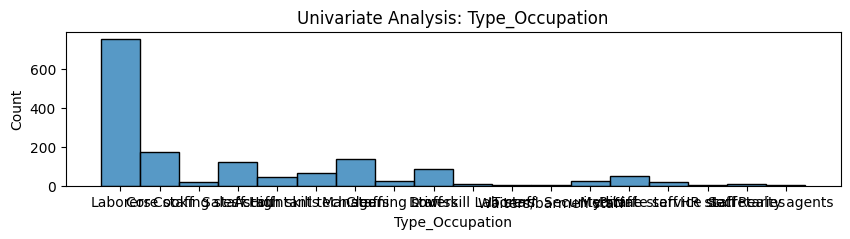

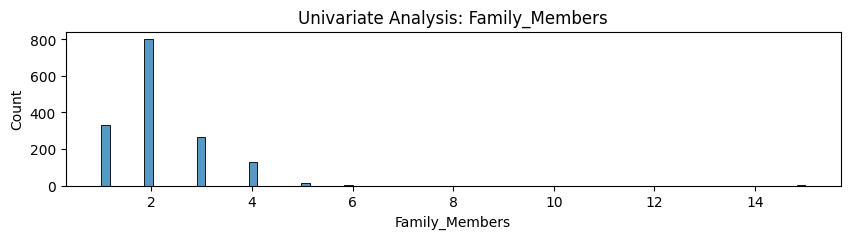

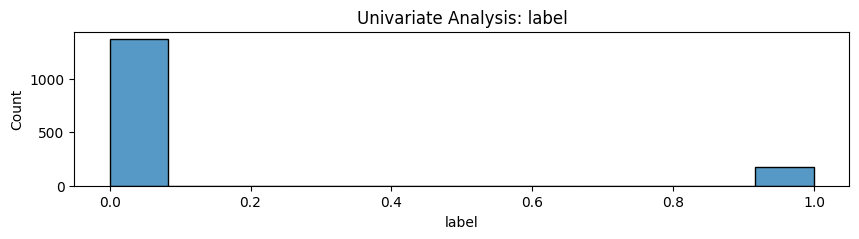

In [31]:
for column in cc.columns:
    plt.figure(figsize=(10,2))
    sns.histplot(cc[column])
    plt.title(f'Univariate Analysis: {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


Insights:
- Most of the applicants are females.
- Most of the applicants do not own car, but they own property.
- From the graph it was found that, more than 1000 applicants do not have children.
- From the Annual income histogram, the graph is right skewed whcih implies that most of the applicants are present towards right of the peak. The peak is pointed at approximate value 0.12.
- From the above histogram we can observe most of the applicants source of income is through working.
- Most of the applicants education level is secondary/secondary special.
- Most of the applicants are married.
- Most of the applicants own house/apartments.
- Birthday count values are normally distributed.
- many of the applicants have lesser employed days.
- Each and every applicant has mobile phones.
- Most of the applicants do not have work phone.
- Only few of the applicants have email-ID.
- Most of the applicants are labourer's by occupation.
- Most of the applicants have 2 members in the family.
- Most of the applicants credit card is approved.

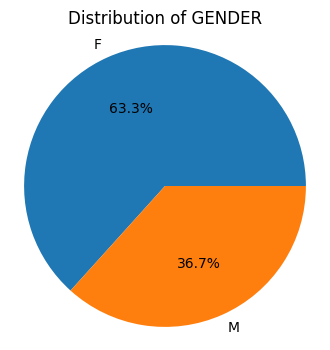

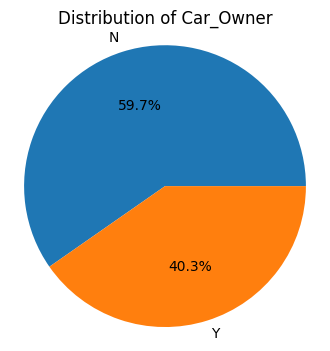

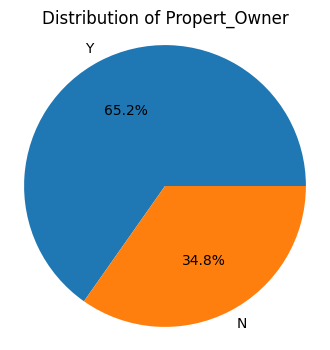

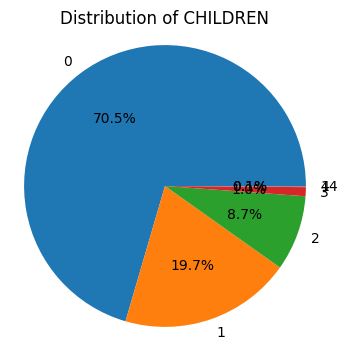

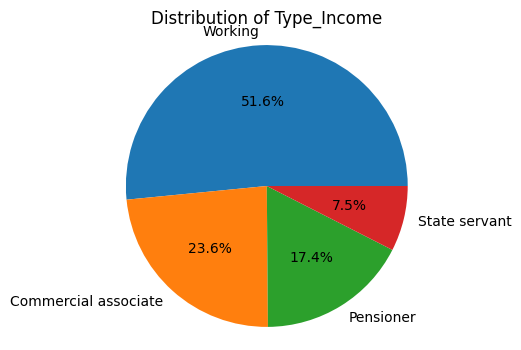

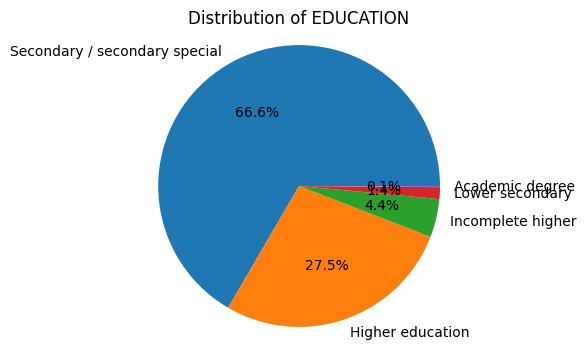

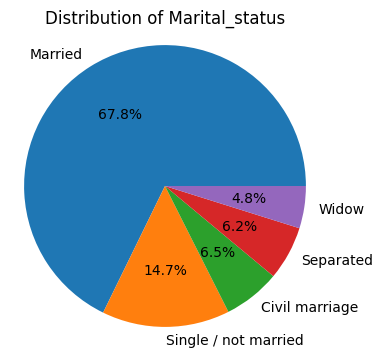

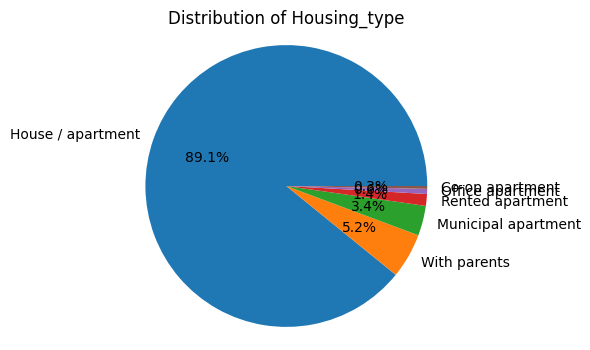

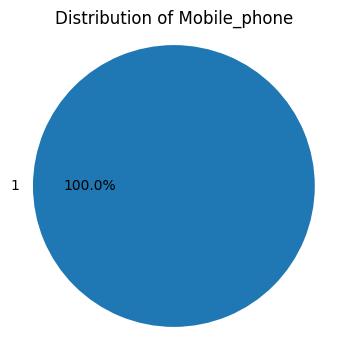

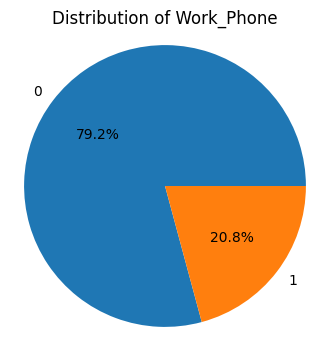

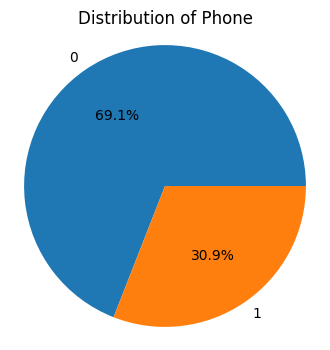

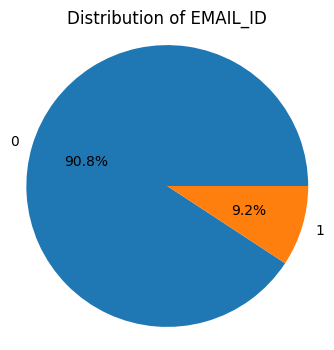

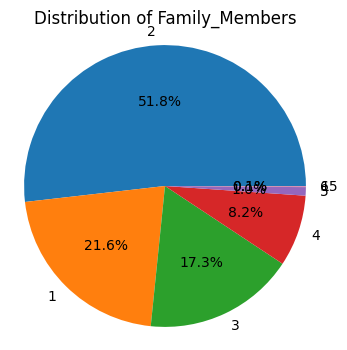

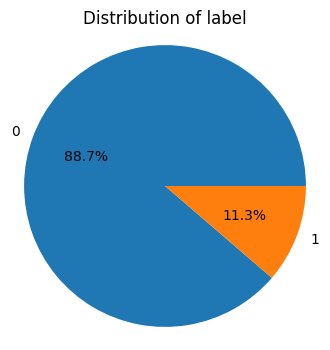

In [32]:
columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label']

for column in columns:

    category_counts = cc[column].value_counts()

    plt.figure(figsize=(4, 4))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {column}')
    plt.axis('equal')
    plt.show()

Insights:

- 63.3% of the aopplicants are females and 36.7% of the applicants are males.
- 40.3% of the applicants own car, and 59.7% of the applicants do not own car.
- 65.2% of the applicants own property and 34.8% of the applicants do not own property.
- 70.5% of the applicants do not have children.
- Approximately 50% of the applicants source of income is through working.
- Approximately 10% of the applicants do not own House/apartment.


Bivariate Analysis
- Correlation
- Scatter plot
- Pair plot















<ipython-input-33-8507fb91683a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=cc.corr()


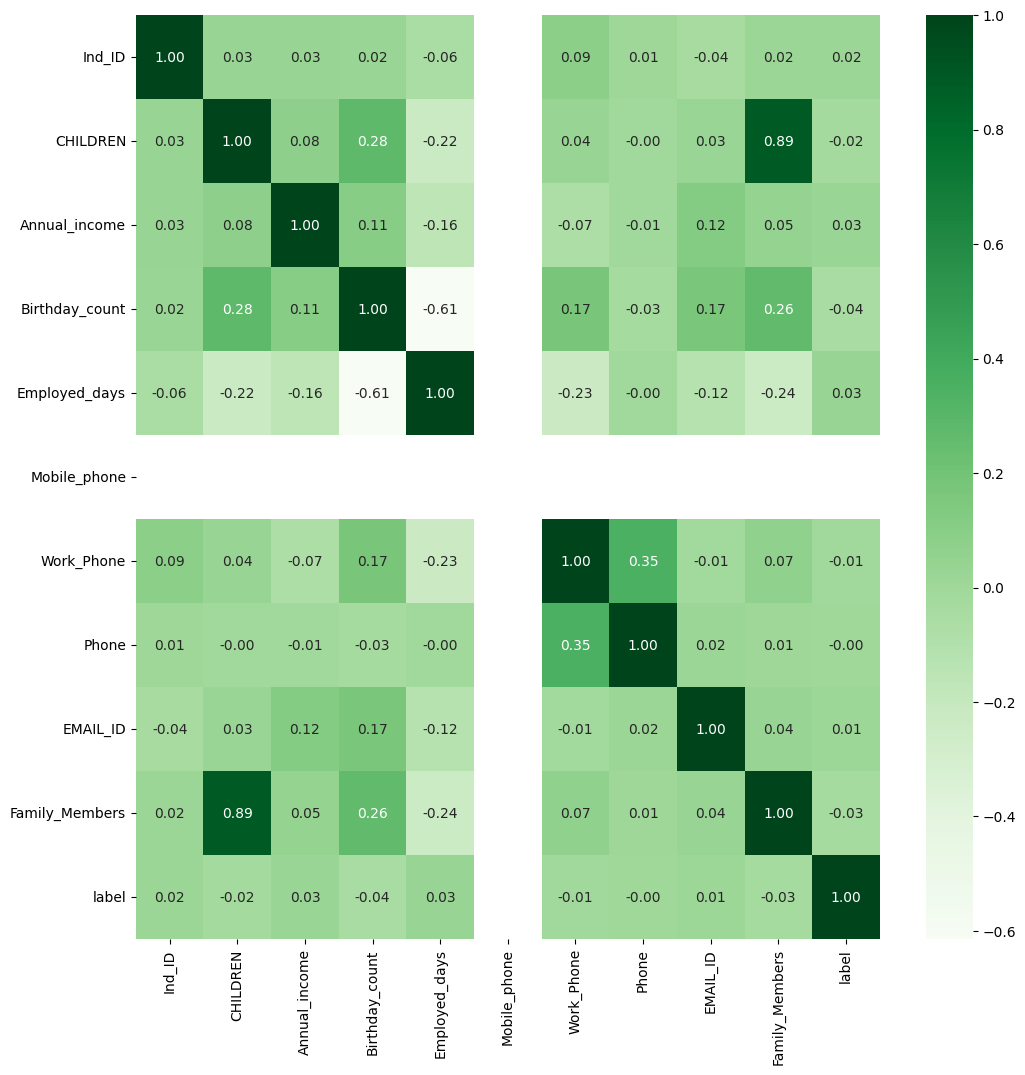

In [33]:
corr_df=cc.corr()

plt.figure(figsize = (12,12))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

Insights:

- The family members and children column are highly correlated.
- The annual income and Employed days are more correlated than any other columns.

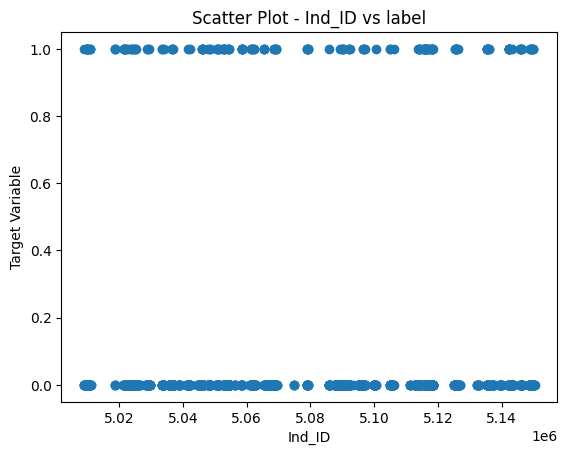

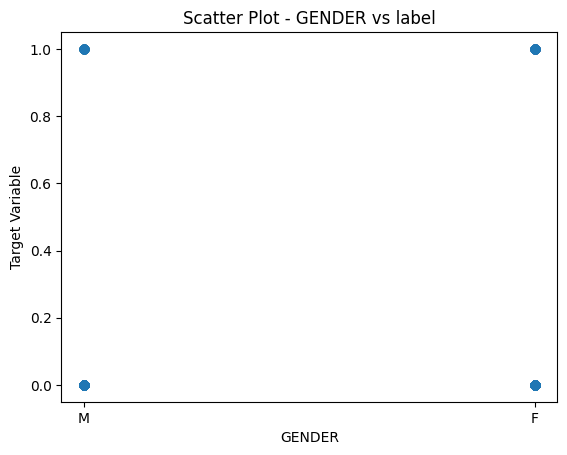

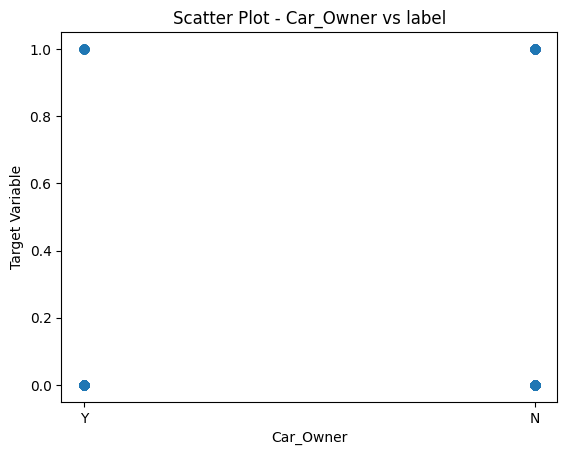

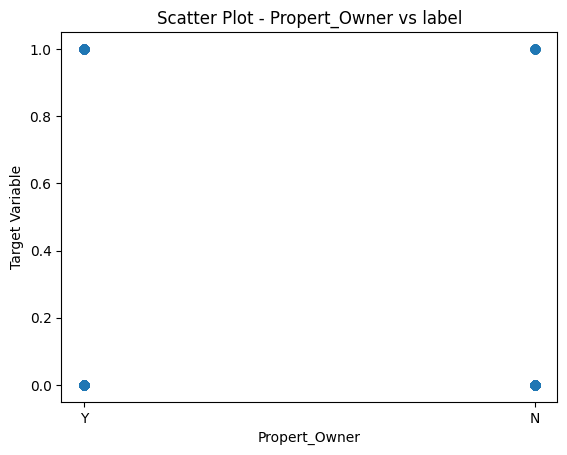

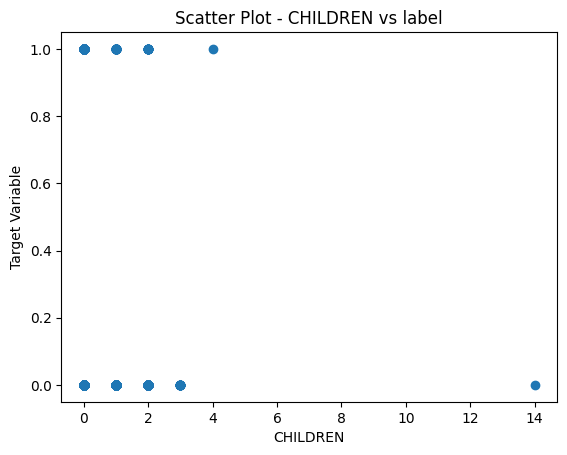

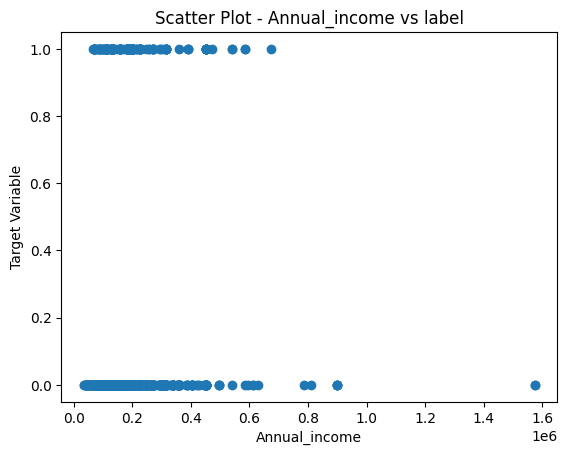

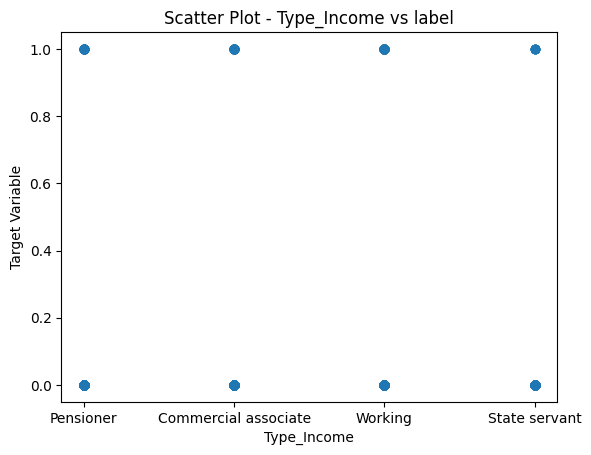

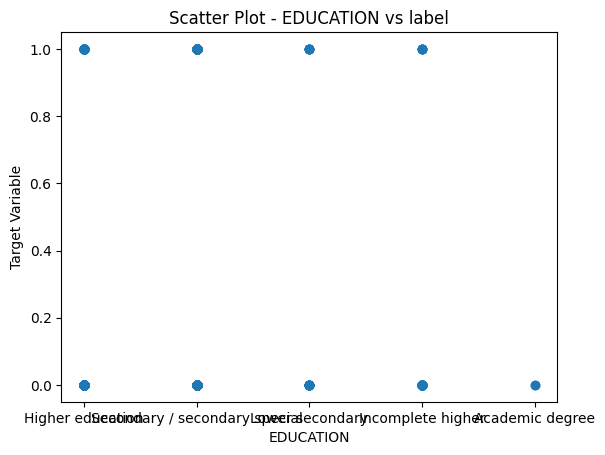

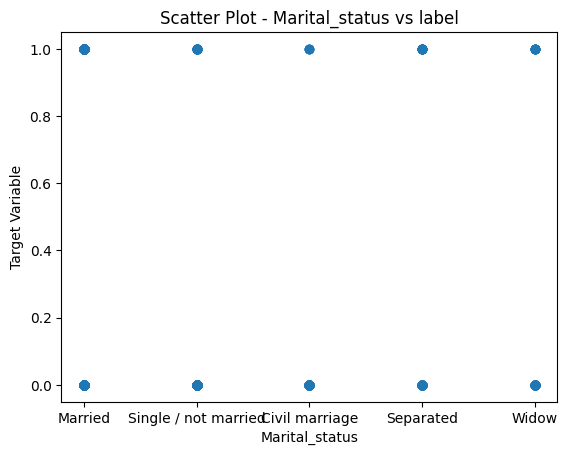

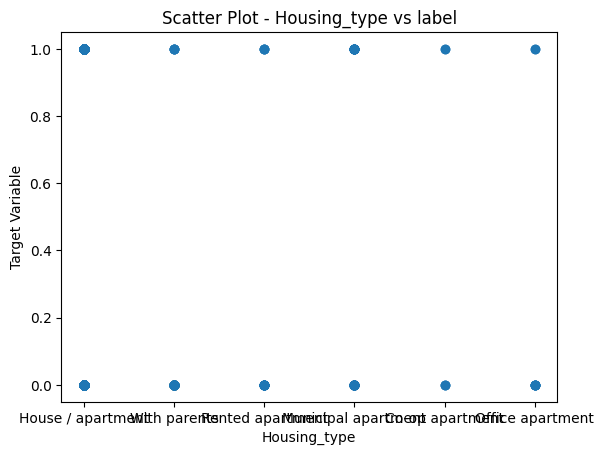

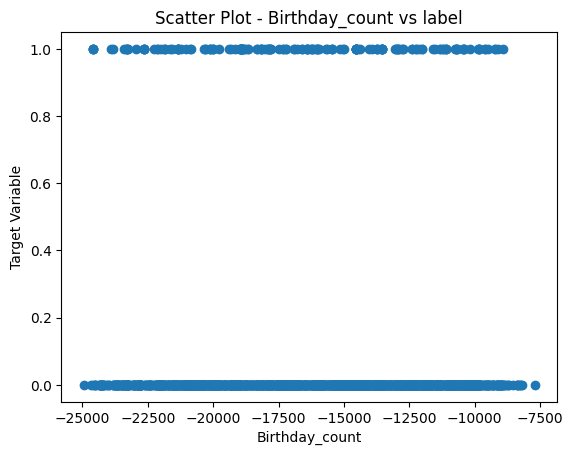

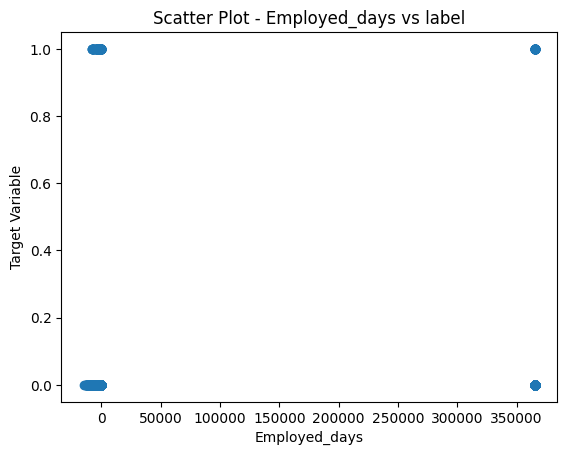

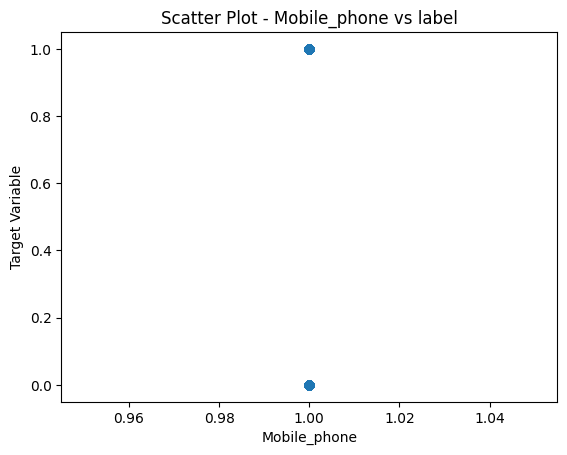

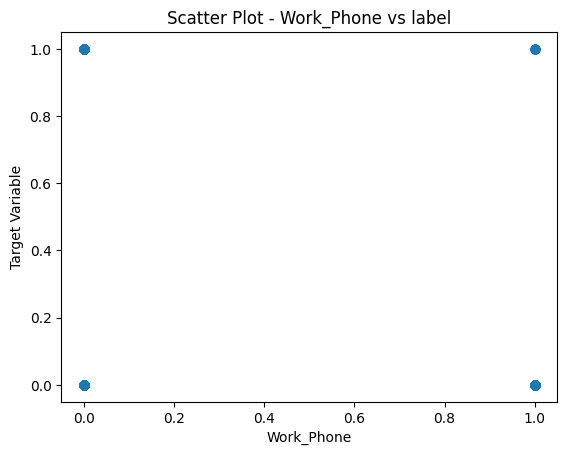

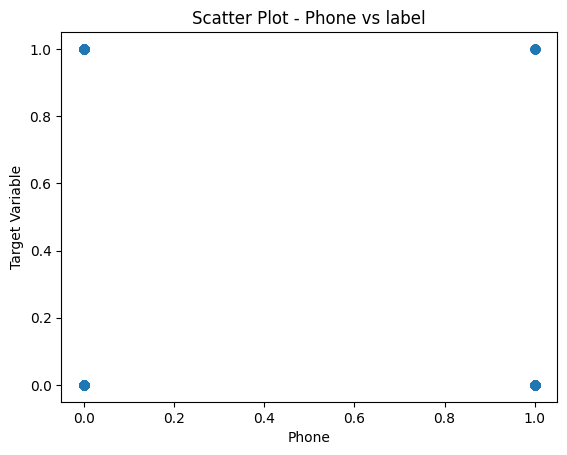

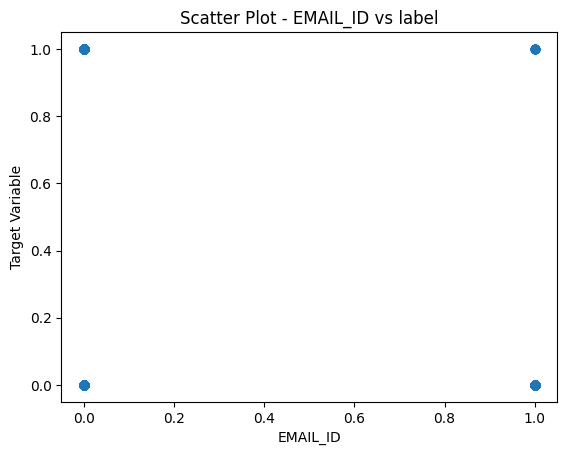

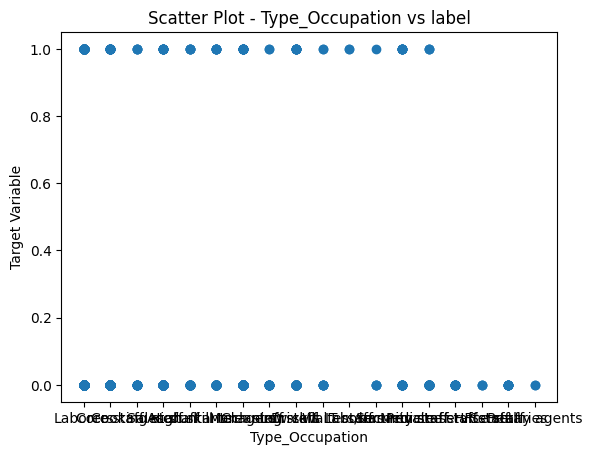

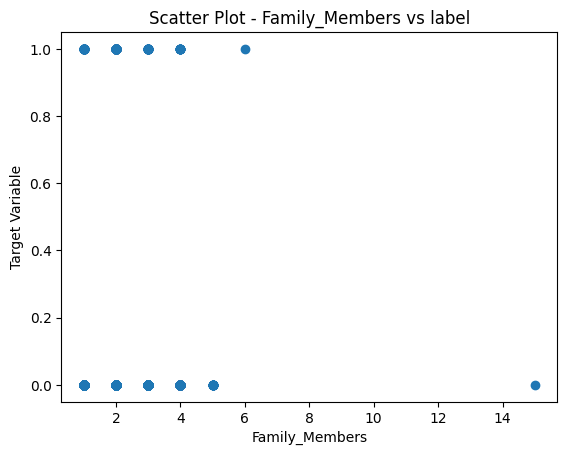

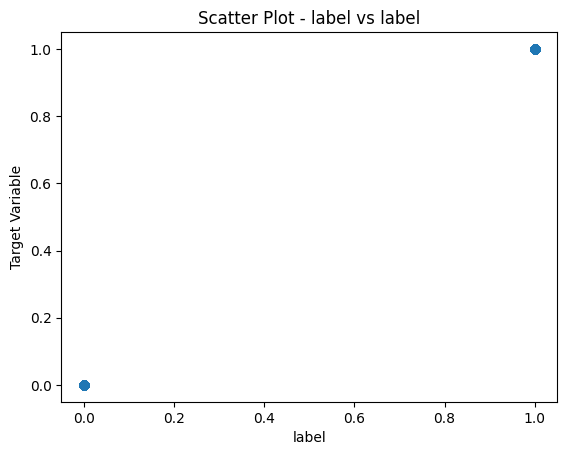

In [34]:
target=['label']
for column in cc.columns:
    # Create a scatter plot between the target variable and the current column

    plt.figure()
    plt.scatter(cc[column], cc['label'])
    plt.xlabel(column)
    plt.ylabel('Target Variable')
    plt.title(f'Scatter Plot - {column} vs label')
    plt.show()

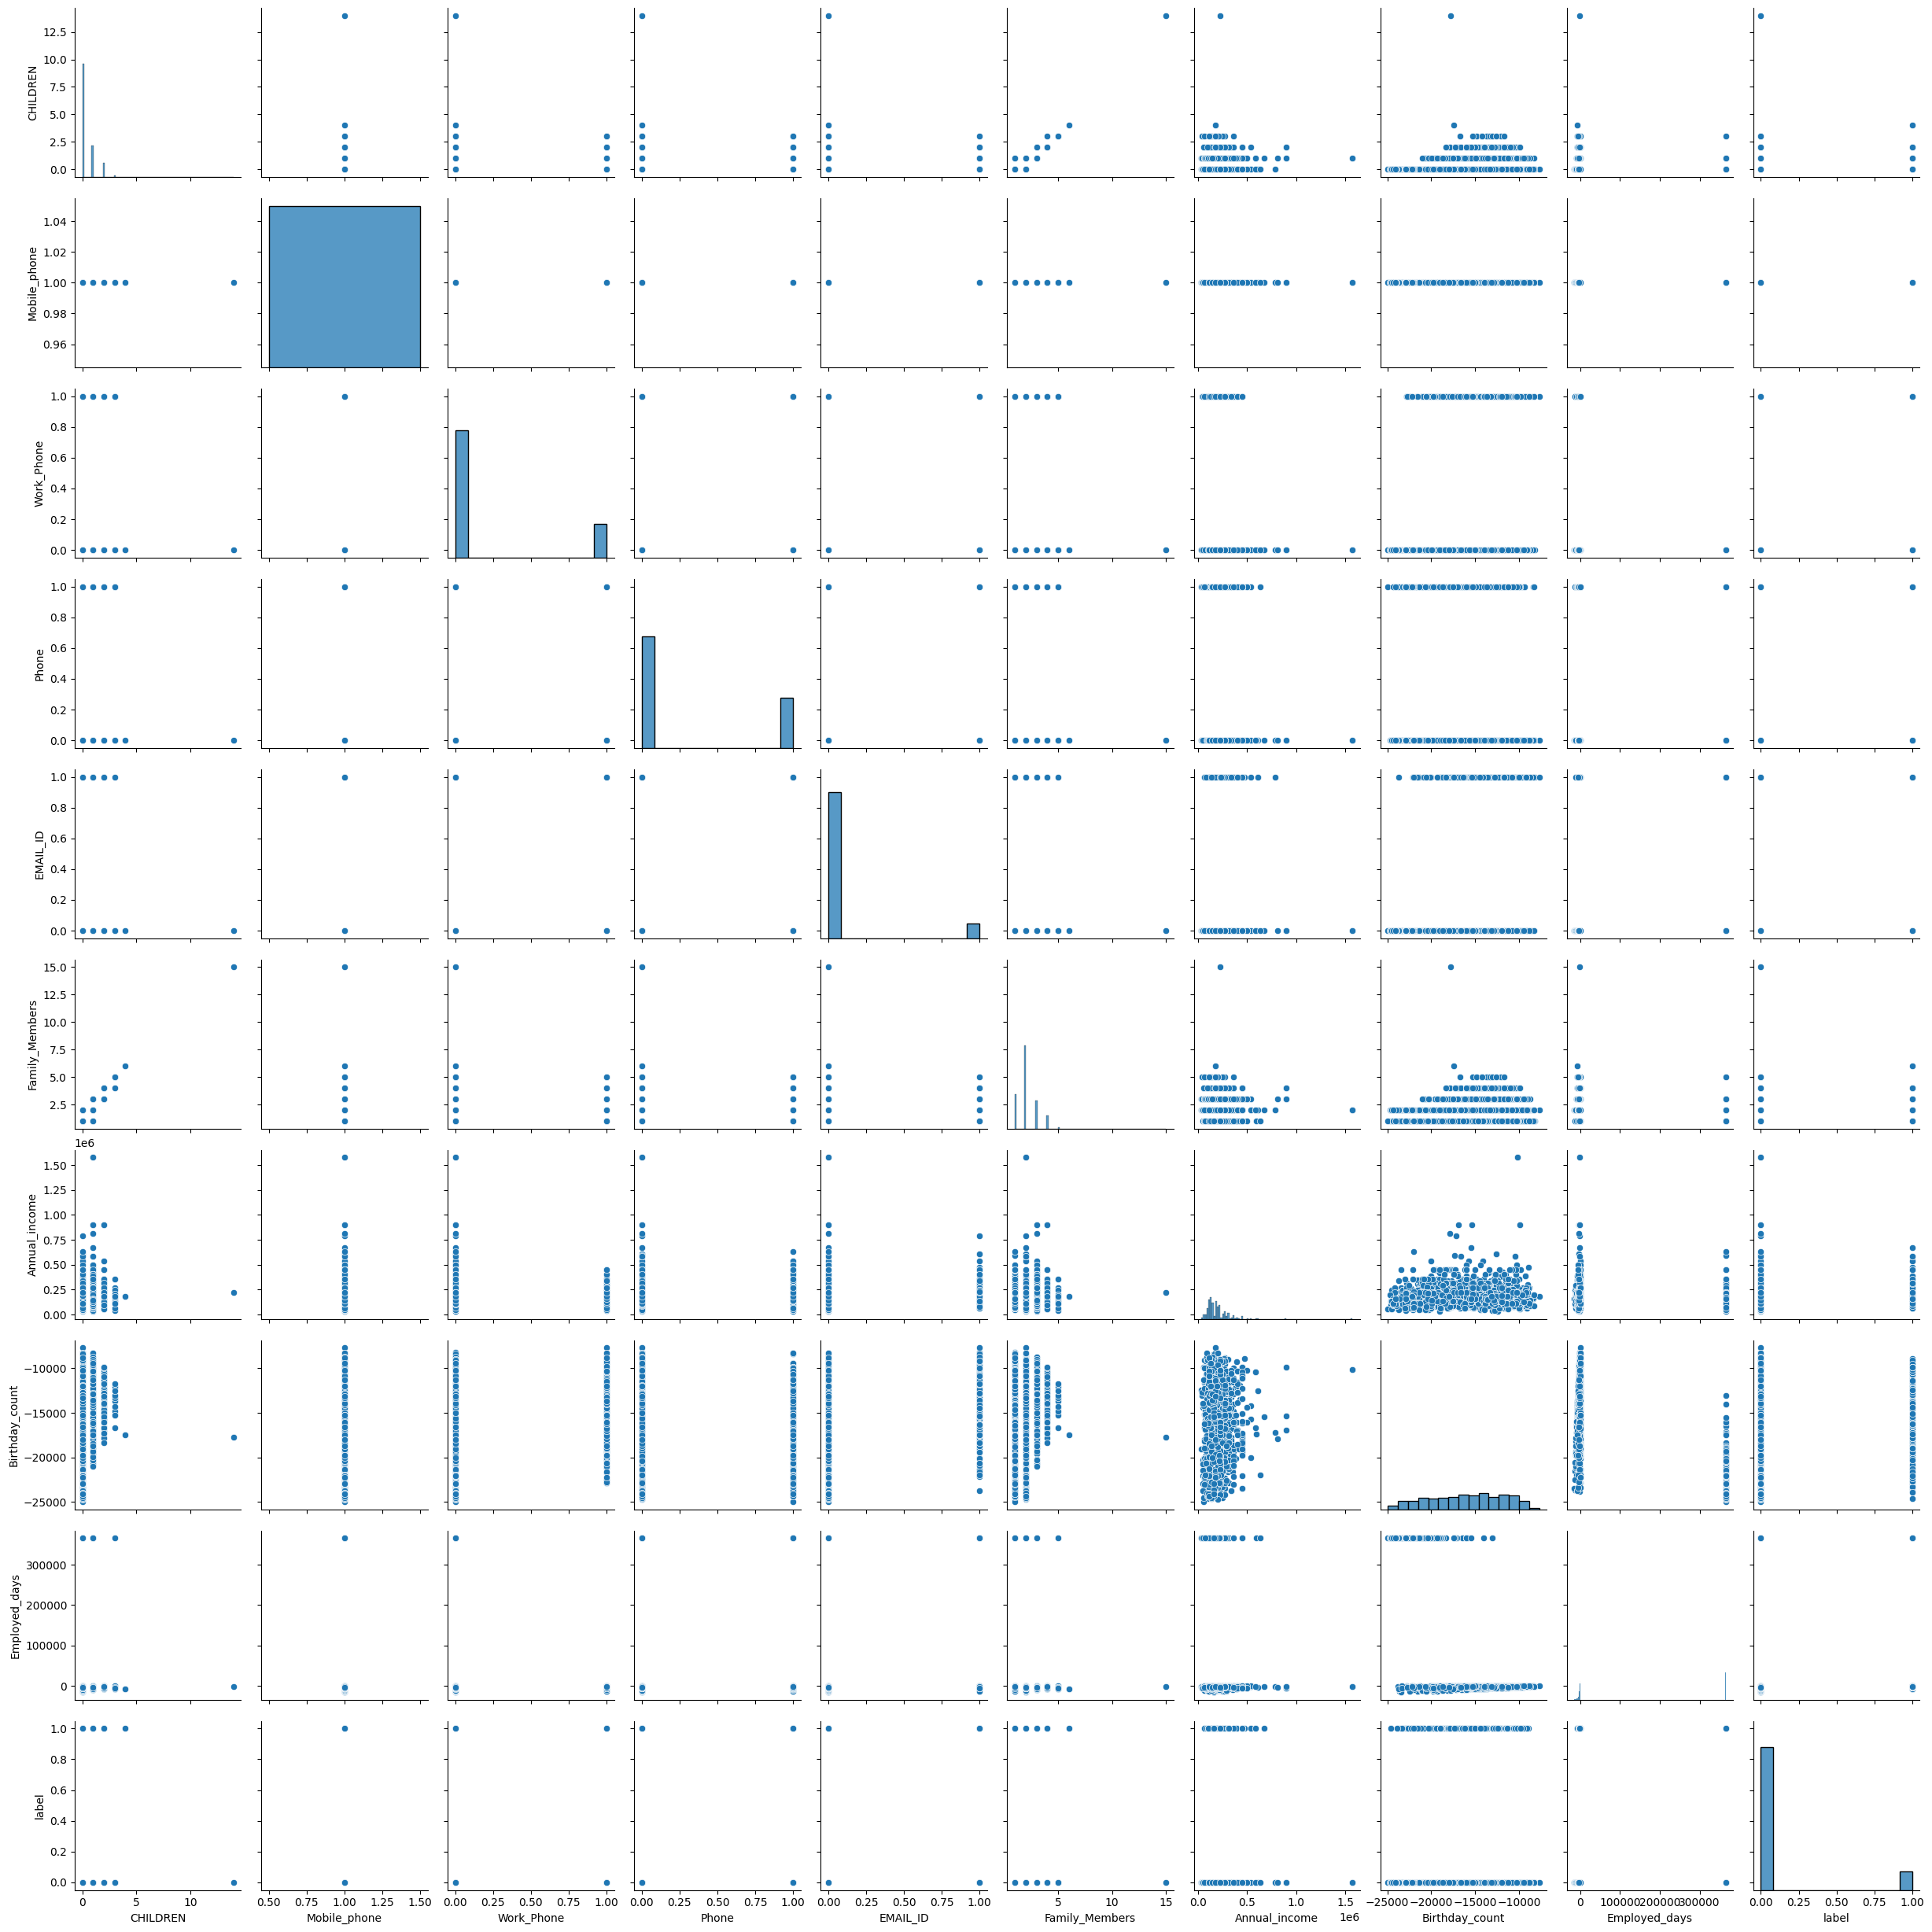

In [35]:
columns = ['GENDER', 'Car_Owner','Propert_Owner','CHILDREN','Type_Income','EDUCATION','Marital_status','Housing_type','Mobile_phone','Work_Phone','Phone','EMAIL_ID','Family_Members','Annual_income','Birthday_count', 'Employed_days' ,'Type_Occupation','label']
sns.pairplot(cc[columns])

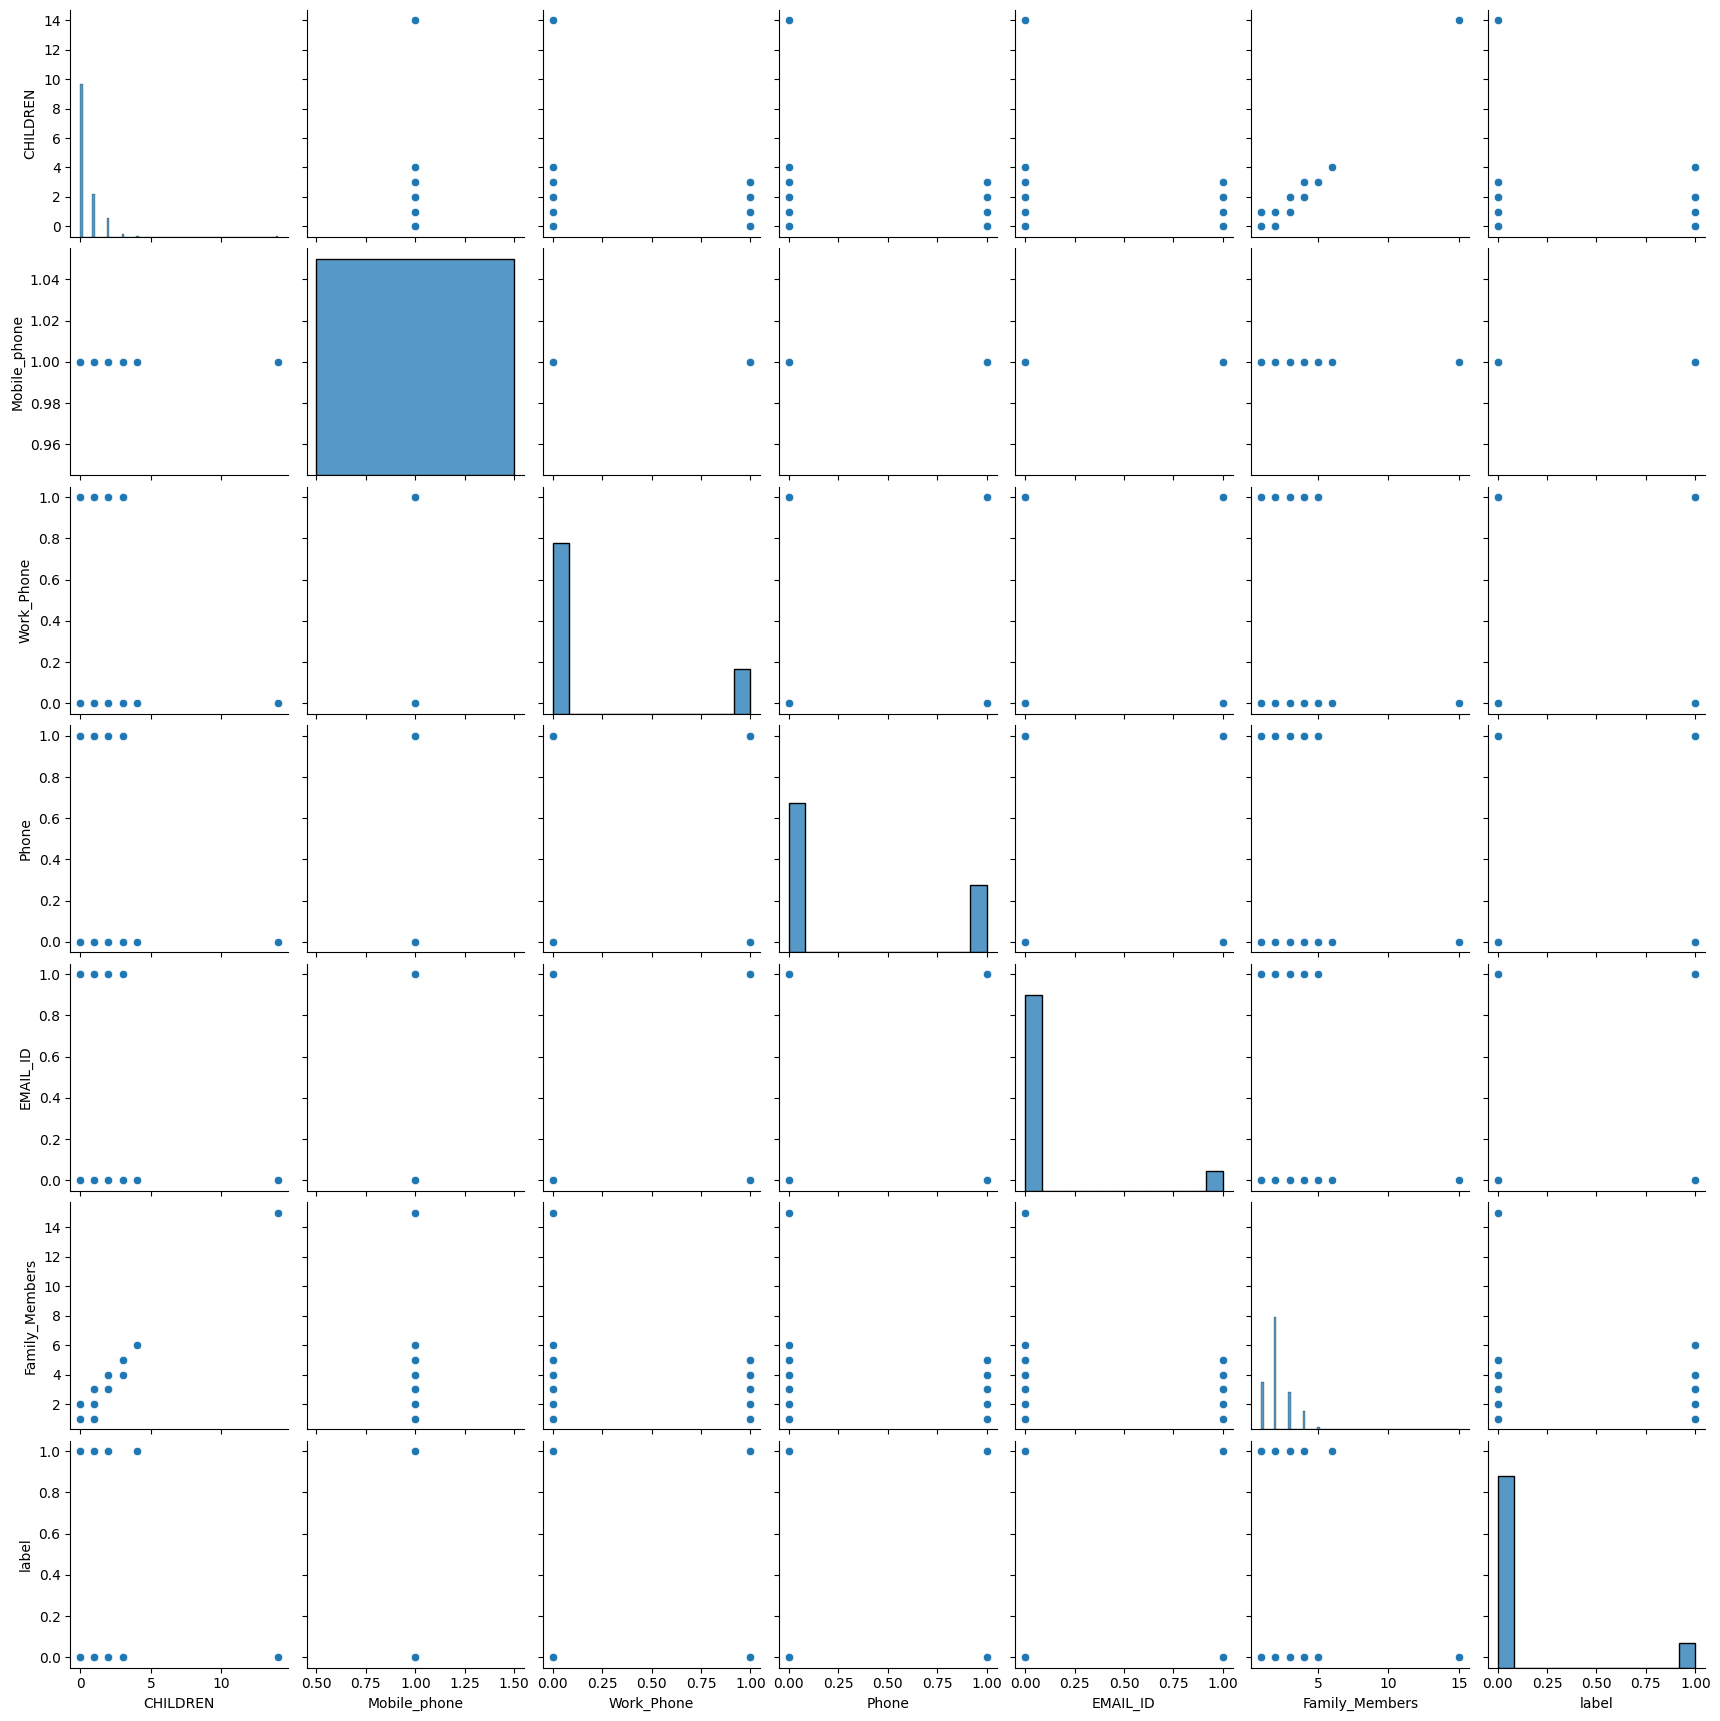

In [36]:
columns = ['GENDER', 'Car_Owner','Propert_Owner','CHILDREN','Type_Income','EDUCATION','Marital_status','Housing_type','Mobile_phone','Work_Phone','Phone','EMAIL_ID','Family_Members','label']
sns.pairplot(cc[columns])

Education Level of applicants in Bar chart

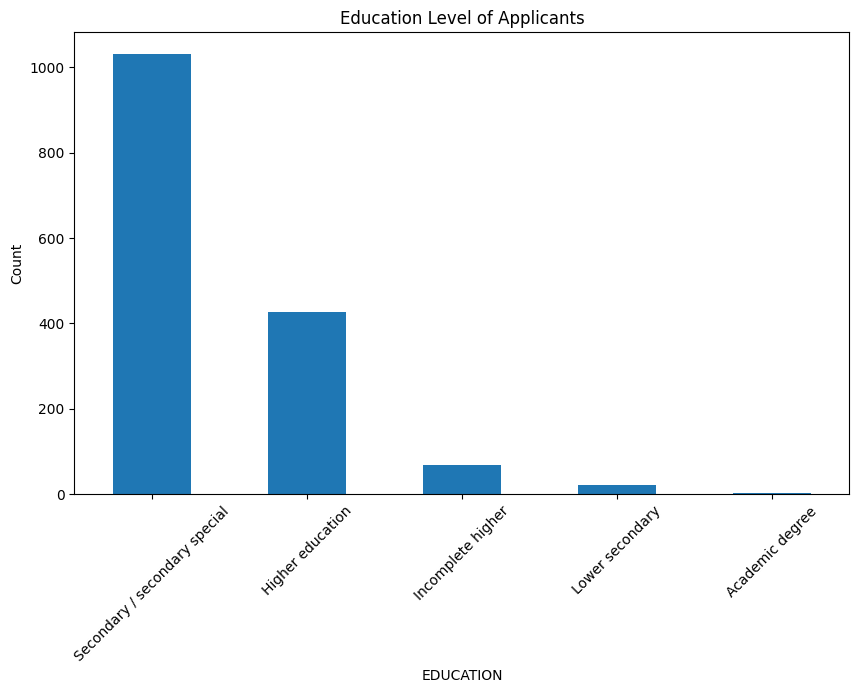

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

education_counts = cc['EDUCATION'].value_counts()

plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.title('Education Level of Applicants')
plt.xticks(rotation=45)
plt.show()

Insights :
- From the graph above, most of the applicants have secondary/secondary special level of Education, which is followed by Higher Education. The remaining applicants contribution towards Education level is minimal/negligible.

Distribution of Gender in Pie Chart

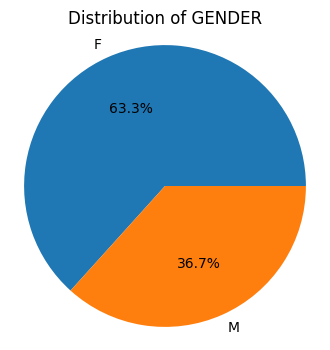

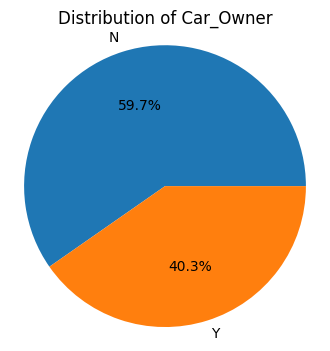

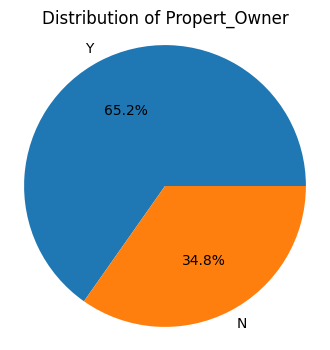

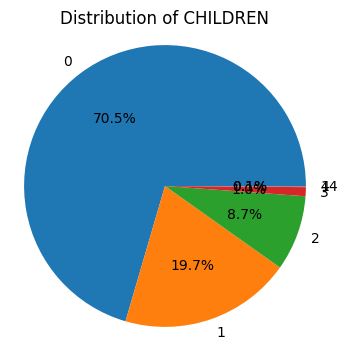

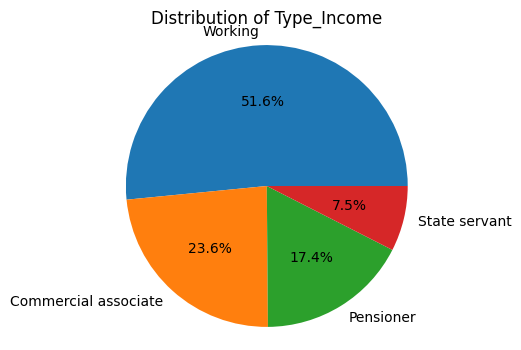

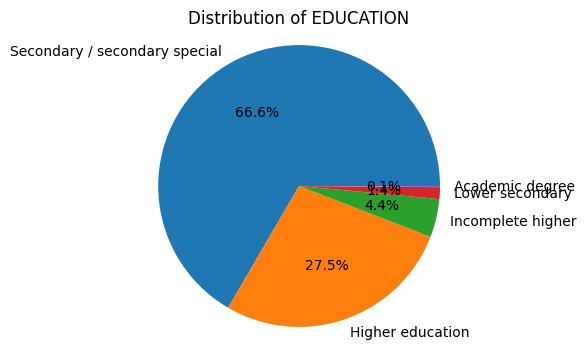

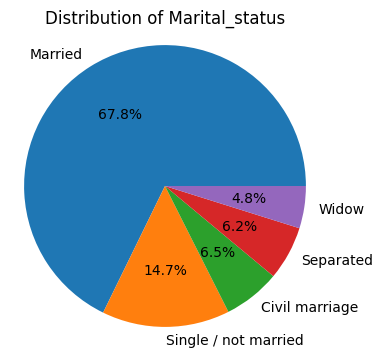

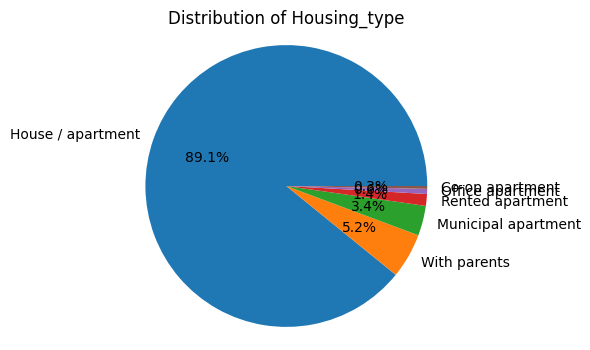

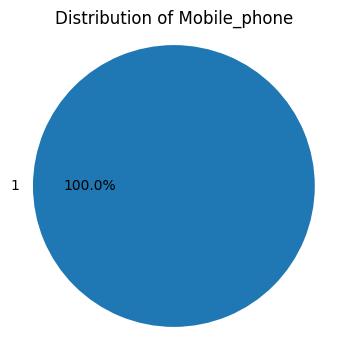

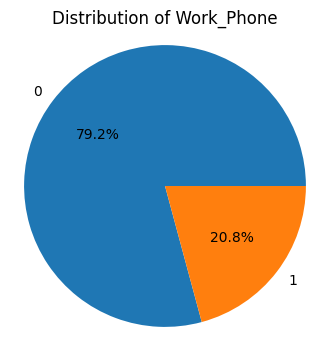

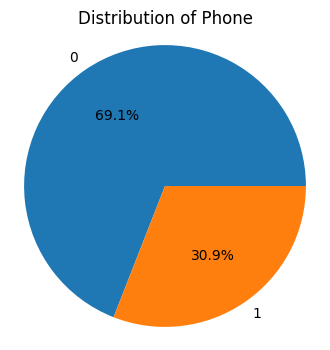

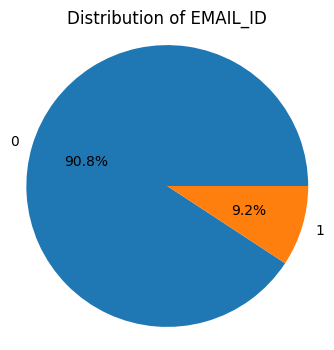

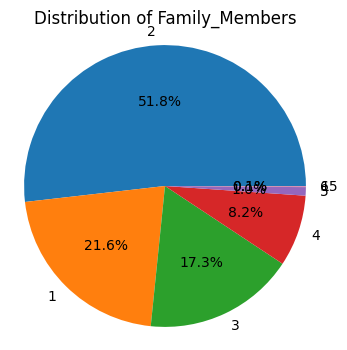

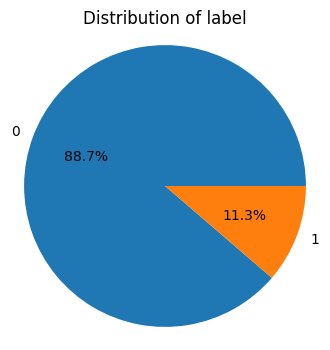

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label']

for column in columns:

    category_counts = cc[column].value_counts()

    plt.figure(figsize=(4, 4))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {column}')
    plt.axis('equal')
    plt.show()

Gender Distribution of Applicants in Stacked Bar Chart

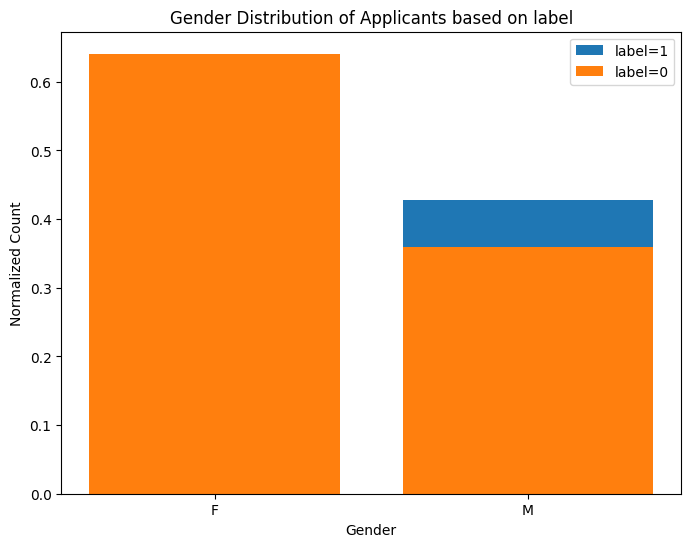

In [39]:
gender_column = 'GENDER'
target = 'label'

categories = cc[target].unique()

plt.figure(figsize=(8, 6))
for category in categories:
    filtered_data = cc[cc[target] == category]
    gender_counts = filtered_data[gender_column].value_counts(normalize=True)
    plt.bar(gender_counts.index, gender_counts.values, label=f'{target}={category}')

plt.xlabel('Gender')
plt.ylabel('Normalized Count')
plt.title('Gender Distribution of Applicants based on label')
plt.legend()
plt.show()

Insights:
- Every female applicant's credit card is approved.
- Few of the male applicant's credit is rejected.

##Feature Engineering


#### Imputation




Changing the categorical variables into numerical columns.


Label encoding :-
- gender
- Car owner
- property owner
- Type income
- Education
- Marital status
- Housing type
- Type occupation


In [40]:
from sklearn.preprocessing import LabelEncoder

columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

encoder = LabelEncoder()

for column in columns:
    if column in cc.columns:
        cc[column] = encoder.fit_transform(cc[column])
print(cc)

       Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       1          1              1         0   180000.00000   
1     5009744       0          1              0         0   315000.00000   
2     5009746       0          1              0         0   315000.00000   
3     5009749       0          1              0         0   191399.32623   
4     5009752       0          1              0         0   315000.00000   
...       ...     ...        ...            ...       ...            ...   
1543  5028645       0          0              1         0   191399.32623   
1544  5023655       0          0              0         0   225000.00000   
1545  5115992       1          1              1         2   180000.00000   
1546  5118219       1          1              0         0   270000.00000   
1547  5053790       0          1              1         0   225000.00000   

      Type_Income  EDUCATION  Marital_status  Housing_type  Birthday_count  \
0        

Standard Scaling


In [41]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a variable named 'data'
# where 'data' is a 2D array or pandas DataFrame

# Extract the target variable column
target_variable = cc['label']

# Remove the target variable column from the dataset
features = cc.drop('label', axis=1)

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Apply standard scaling to the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame or array combining the scaled features and target variable
cc = pd.DataFrame(scaled_features, columns=features.columns)
cc['label'] = target_variable

Test/Train Split

In [42]:
from sklearn.model_selection import train_test_split

X = cc[['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'Annual_income', 'Birthday_count', 'Employed_days', 'Type_Occupation']]
y = cc['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X_train

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Annual_income,Birthday_count,Employed_days,Type_Occupation
730,-0.761309,-0.821781,0.729845,-0.531645,0.888906,0.691398,0.576153,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-1.225901,-0.501900,0.304991,-0.440463,0.081399
100,1.313527,-0.821781,-1.370155,0.756284,0.102156,0.691398,-0.444310,0.737946,0.0,-0.512487,-0.669390,-0.319029,0.884994,-0.942403,0.244486,-0.480756,-1.357026
619,-0.761309,-0.821781,-1.370155,0.756284,0.888906,0.691398,-1.464773,-0.301490,0.0,1.951270,-0.669390,-0.319029,0.884994,-0.942403,1.387182,-0.437450,-2.220082
838,1.313527,-0.821781,-1.370155,-0.531645,0.102156,0.691398,-0.444310,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-1.102585,1.044873,-0.451373,0.081399
1419,-0.761309,-0.821781,-1.370155,-0.531645,-0.684595,0.691398,0.576153,0.737946,0.0,-0.512487,-0.669390,-0.319029,-1.225901,-0.702128,-1.331278,2.220314,0.081399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-0.761309,-0.821781,-1.370155,-0.531645,-1.471346,-1.533725,-0.444310,-0.301490,0.0,1.951270,1.493899,3.134513,-0.170453,1.099928,-0.035174,-0.433160,1.807510
1294,1.313527,1.216869,0.729845,0.756284,0.888906,0.691398,-0.444310,-0.301490,0.0,1.951270,-0.669390,-0.319029,0.884994,0.098785,1.386944,-0.433189,0.081399
860,1.313527,1.216869,-1.370155,2.044213,0.888906,0.691398,-0.444310,-0.301490,0.0,-0.512487,1.493899,-0.319029,1.940442,-0.702128,0.701612,-0.432492,0.081399
1459,-0.761309,-0.821781,0.729845,-0.531645,0.888906,-1.533725,-0.444310,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-0.181534,-0.549709,-0.458885,-0.493971


In [44]:
y_train

730     0
100     1
619     0
838     0
1419    0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: label, Length: 1083, dtype: int64

In [45]:
X_test

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Annual_income,Birthday_count,Employed_days,Type_Occupation
30,-0.761309,-0.821781,0.729845,-0.531645,0.888906,-0.050310,1.596616,2.816818,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-0.902357,0.956259,-0.465542,-1.932397
1514,-0.761309,-0.821781,-1.370155,-0.531645,-0.684595,0.691398,2.617078,0.737946,0.0,-0.512487,1.493899,-0.319029,-1.225901,-1.082563,-1.416319,2.220314,0.081399
1182,-0.761309,-0.821781,-1.370155,2.044213,0.888906,-0.050310,1.596616,-0.301490,0.0,-0.512487,-0.669390,-0.319029,0.884994,-0.982448,0.158968,-0.447852,1.807510
1205,-0.761309,-0.821781,0.729845,-0.531645,-0.684595,0.691398,2.617078,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-1.225901,-0.702128,-1.662153,2.220314,0.081399
528,1.313527,-0.821781,0.729845,-0.531645,0.888906,0.691398,-1.464773,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,0.299014,1.303094,-0.439446,0.656770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,1.313527,-0.821781,0.729845,-0.531645,0.888906,0.691398,1.596616,-0.301490,0.0,1.951270,1.493899,-0.319029,-1.225901,-0.301672,1.820964,-0.441871,-1.357026
978,-0.761309,1.216869,0.729845,-0.531645,0.888906,0.691398,-0.444310,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,0.218922,-1.232897,-0.457347,0.656770
892,-0.761309,-0.821781,-1.370155,-0.531645,-0.684595,-1.533725,-0.444310,0.737946,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-0.501900,-0.871770,2.220314,0.081399
109,1.313527,-0.821781,-1.370155,-0.531645,0.888906,0.691398,2.617078,0.737946,0.0,-0.512487,-0.669390,-0.319029,-1.225901,0.299014,-0.801736,-0.433429,2.382880


In [46]:
y_test

30      1
1514    0
1182    0
1205    0
528     0
       ..
312     0
978     0
892     0
109     1
952     0
Name: label, Length: 465, dtype: int64

##Machine Learning

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
# Create an instance of the LogisticRegression class
logistic_model = LogisticRegression()

# Train the logistic regression model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

KNN Algorithm

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
# Create an instance of the KNeighborsClassifier class
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Decision Tree Algorithm

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
# Create an instance of the DecisionTreeClassifier class
tree_model = DecisionTreeClassifier()

# Train the decision tree model on the training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

Random Forest Algorithm

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
# Create an instance of the RandomForestClassifier class
forest_model = RandomForestClassifier()

# Train the random forest model on the training data
forest_model.fit(X_train, y_train)

RandomForestClassifier()

SVM Algorithm

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
# Create an instance of the SVC class
svm_model = SVC()

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

SVC()

##Prediction


Logistic Regression

In [57]:
lr_pred = logistic_model.predict(X_test)

KNN

In [58]:
knn_pred = knn_model.predict(X_test)

Decission Tree

In [59]:
dt_pred = tree_model.predict(X_test)

Random Forest

In [60]:
rf_pred = forest_model.predict(X_test)

SVM

In [61]:
svm_pred = svm_model.predict(X_test)

## Evaluating the Prediction

Logistic Regression

In [62]:
accuracy_lr = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy_lr)

Accuracy: 0.9075268817204301


In [63]:
from sklearn.metrics import precision_score, confusion_matrix, classification_report

In [64]:
lr_precision = precision_score(y_test, lr_pred,zero_division=0)
print("Precision Score",lr_precision)

Precision Score 0.0


In [65]:
lr_confusion_matrix = confusion_matrix(y_test, lr_pred)
print("Score Of Confusion Matrix",lr_confusion_matrix)

Score Of Confusion Matrix [[422   0]
 [ 43   0]]


In [66]:
lr_classification_report = classification_report(y_test, lr_pred,zero_division=0)
print("Score Of Classification report",lr_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



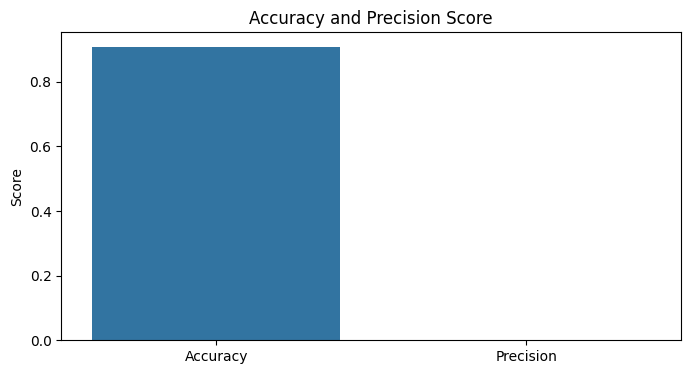

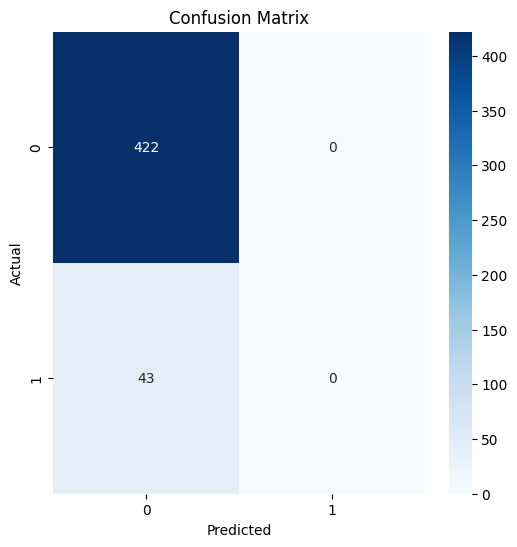

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



In [67]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_lr, 'Precision': lr_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(lr_classification_report)

KNN

In [68]:
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.8924731182795699


In [69]:
knn_precision = precision_score(y_test, knn_pred,zero_division=0)
print("Precision Score",knn_precision)

Precision Score 0.18181818181818182


In [70]:
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
print("Score Of Confusion Matrix",knn_confusion_matrix)

Score Of Confusion Matrix [[413   9]
 [ 41   2]]


In [71]:
knn_classification_report = classification_report(y_test, knn_pred,zero_division=0)
print("Score Of Classification report",knn_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.91      0.98      0.94       422
           1       0.18      0.05      0.07        43

    accuracy                           0.89       465
   macro avg       0.55      0.51      0.51       465
weighted avg       0.84      0.89      0.86       465



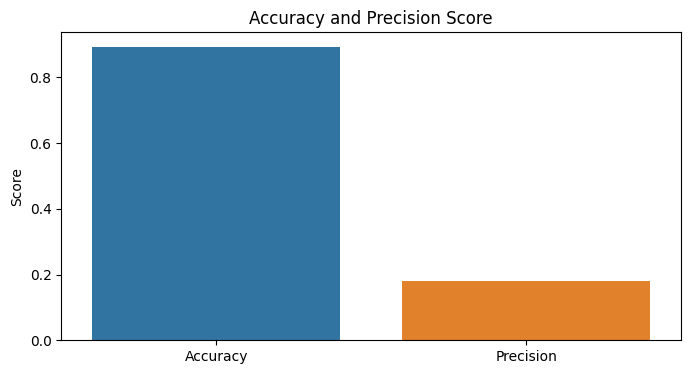

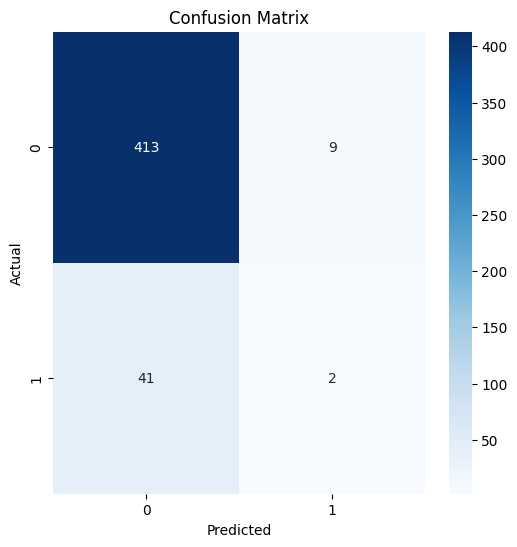

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       422
           1       0.18      0.05      0.07        43

    accuracy                           0.89       465
   macro avg       0.55      0.51      0.51       465
weighted avg       0.84      0.89      0.86       465



In [72]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_knn, 'Precision': knn_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(knn_classification_report)

Decision Tree

In [73]:
accuracy_dt = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy_dt)

Accuracy: 0.8688172043010752


In [74]:
dt_precision = precision_score(y_test, dt_pred,zero_division=0)
print("Precision Score",dt_precision)

Precision Score 0.3269230769230769


In [75]:
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
print("Score Of Confusion Matrix",dt_confusion_matrix)

Score Of Confusion Matrix [[387  35]
 [ 26  17]]


In [76]:
dt_classification_report = classification_report(y_test, dt_pred,zero_division=0)
print("Score Of Classification report",dt_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.94      0.92      0.93       422
           1       0.33      0.40      0.36        43

    accuracy                           0.87       465
   macro avg       0.63      0.66      0.64       465
weighted avg       0.88      0.87      0.87       465



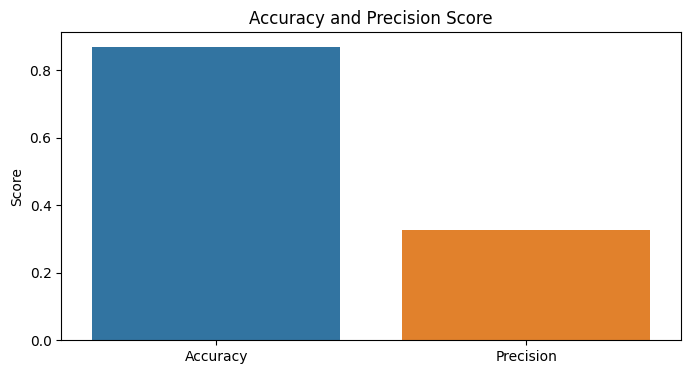

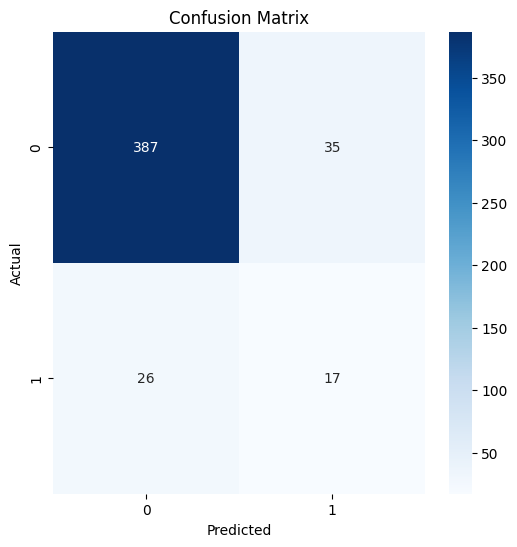

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       422
           1       0.33      0.40      0.36        43

    accuracy                           0.87       465
   macro avg       0.63      0.66      0.64       465
weighted avg       0.88      0.87      0.87       465



In [77]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_dt, 'Precision': dt_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(dt_classification_report)

Random Forest

In [78]:
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy_rf)

Accuracy: 0.9376344086021505


In [79]:
rf_precision = precision_score(y_test, rf_pred,zero_division=0)
print("Precision Score",rf_precision)

Precision Score 0.8181818181818182


In [80]:
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
print("Score Of Confusion Matrix",rf_confusion_matrix)

Score Of Confusion Matrix [[418   4]
 [ 25  18]]


In [81]:
rf_classification_report = classification_report(y_test, rf_pred,zero_division=0)
print("Score Of Classification report",rf_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.94      0.99      0.97       422
           1       0.82      0.42      0.55        43

    accuracy                           0.94       465
   macro avg       0.88      0.70      0.76       465
weighted avg       0.93      0.94      0.93       465



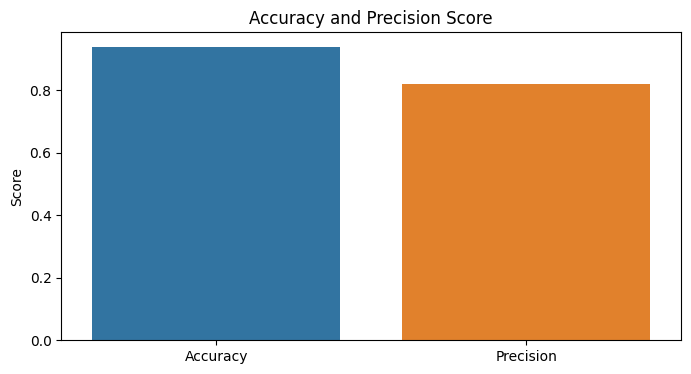

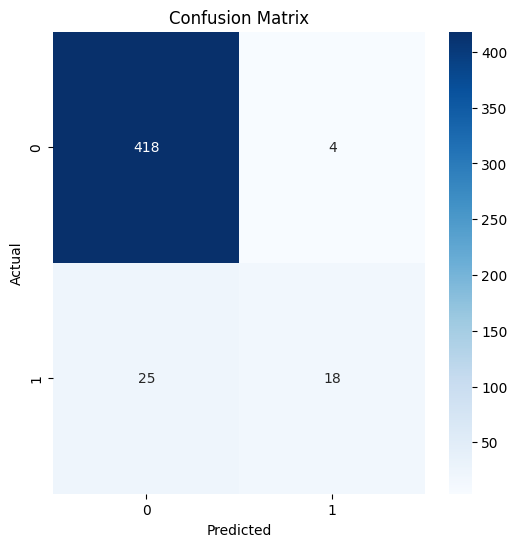

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       422
           1       0.82      0.42      0.55        43

    accuracy                           0.94       465
   macro avg       0.88      0.70      0.76       465
weighted avg       0.93      0.94      0.93       465



In [82]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_rf, 'Precision': rf_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(rf_classification_report)

SVM

In [83]:
accuracy_svm = accuracy_score(y_test, svm_pred)
print("Accuracy:", accuracy_svm)

Accuracy: 0.9075268817204301


In [84]:
svm_precision = precision_score(y_test, svm_pred,zero_division=0)
print("Precision Score",svm_precision)

Precision Score 0.0


In [85]:
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
print("Score Of Confusion Matrix",svm_confusion_matrix)

Score Of Confusion Matrix [[422   0]
 [ 43   0]]


In [86]:
svm_classification_report = classification_report(y_test, svm_pred,zero_division=0)
print("Score Of Classification report",svm_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



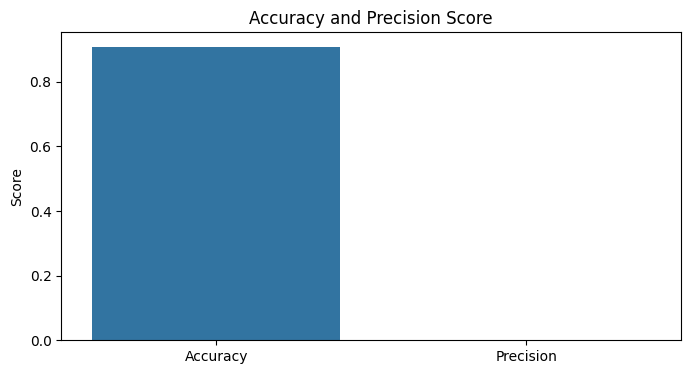

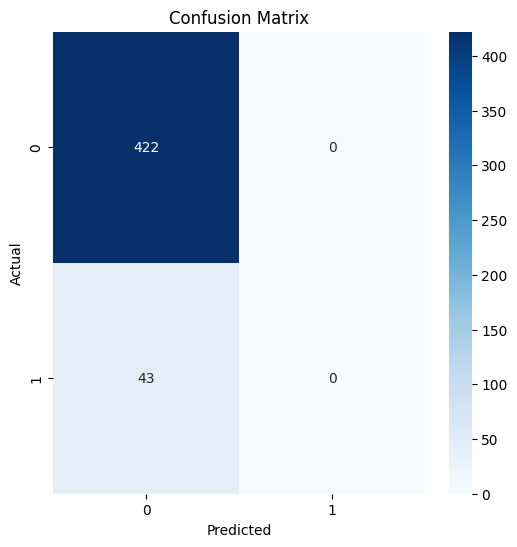

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



In [87]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_svm, 'Precision': svm_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(svm_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(svm_classification_report)

## Conclusion


Based on the evaluation, we can conclude that Random forest is the best algorithm to use for this dataset.